In [1]:
%matplotlib inline
from __future__ import print_function, division, absolute_import
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#sns.set_context("notebook", font_scale=1.5)
# !pip install docopt  # ??
# !pip install tqdm
# import tqdm

In [7]:
training_ids = pd.read_csv("/jupyter/data/Training_IDs of interesting algo for exit rule opt_2016_04_11.csv")

In [84]:
training_ids

,id,name,sharpe_ratio,net_profit,key,side,symbol,loss_cut,profit_take,timeframe
0,1088,Dama1,1.240054,132.1,20160310-174703_slk80-4-app-2-www_dc399006,short,USDJPY,2,4,1Min
1,925,短期,0.599262,281.7,20160307-134254_slk80-1-app-0-www_a9116eef,long,USDJPY,1,3,1Min
2,1075,こつこついこうぜ,0.447214,21.4,20160310-110555_slk80-3-app-1-www_4f325195,long,USDJPY,5,7,15Min
3,1826,てすと,0.408248,51.0,20160314-074606_slk80-4-app-2-www_0f3ba7a5,long,USDJPY,1,3,5Min
4,1814,テスト,0.316378,31.1,20160314-031906_slk80-1-app-0-www_d7c4bb63,long,USDJPY,1,3,1Min
5,859,DAVID BOWIE,0.300419,47.0,20160308-015721_slk80-4-app-2-www_34ebb32b,short,USDJPY,1,3,5Min
6,859,DAVID BOWIE,0.300419,47.0,20160308-015721_slk80-4-app-2-www_34ebb32b,short,USDJPY,1,3,5Min
7,1115,Short trade,0.293935,174.6,20160311-025519_slk80-4-app-2-www_511a5c54,short,USDJPY,1,3,1Min
8,1703,EUR/USD 1H SHORT,0.289164,181.2,20160313-131245_slk80-1-app-0-www_d3bd5c48,short,EURUSD,1,3,1H
9,2361,test3,0.287305,81.0,20160323-051718_slk80-3-app-1-www_6c2be706,long,USDJPY,1,5,5Min


---

In [2]:
from ml.trainlogging import TrainLogger
from StringIO import StringIO
import cPickle

from utils import parse_json

# 
import pytz
import datetime
import json
def load_json(fn):
    with open(fn, "r") as f:
        return json.load(f)
    

In [3]:
model_params = load_json("/project/exp/list_mp.json")
dataset = load_json("/project/exp/list.json")
gpu = 0
# training_id = "test_1337"

# bt_start = datetime.datetime(2014, 12, 1, tzinfo=pytz.utc)
# bt_end = datetime.datetime(2015, 10, 1, tzinfo=pytz.utc)
bt_start = datetime.datetime(2014, 2, 4, tzinfo=pytz.utc)
bt_end = datetime.datetime(2016, 2, 4, tzinfo=pytz.utc)
bt_batch_size = 50

link = "lstm"
gpu = 0
prefix = ""
algoci = "store_true"
#title =     

bt_is_buy = True
bt_loss_cut = 10.0
bt_profit_take = 0.0
bt_threshold = 0.85

meta = {}

In [4]:
# 2,108
# 20160316-154406_slk80-4-app-2-www_8a437b40
# 1897 profit
# 20160313-131604_slk80-3-app-1-www_937d281d
# -2019 loss, short 4,3 1Min, 02/03/14 01/03/16
# 20160329-110657_slk80-4-app-2-www_83f4f15f
# 960 profit, 12/02/08 12/02/16
# 20160309-112926_slk80-3-app-1-www_2425949d, short, EURUSD, 3, 1, 15Min
tl = TrainLogger(training_id="20160309-112926_slk80-3-app-1-www_2425949d")

tl.path_fmt = 'trading/hdf5/prod/{}'

tl.training_id = "20160309-112926_slk80-3-app-1-www_2425949d"

path = tl.path_fmt.format(tl.training_id)

bucket = tl._bucket()
key = bucket.get_key(path)

with open("/project/data/cache/tttmp","w+") as f:
    key.get_file(f)

In [5]:
from trading.backtest.scorer import Scorer

training_id = "tttmp"
bt_start = datetime.datetime(2014, 3, 2, tzinfo=pytz.utc)
bt_end = datetime.datetime(2016, 3, 2, tzinfo=pytz.utc)
bt_batch_size = 50

bt_result = Scorer.calc_score(
    training_id,
    model_params['symbol'],
    model_params['timeframe'],
    bt_start,
    bt_end,
    bt_batch_size)

/usr/local/lib/python2.7/dist-packages/chainer/cuda.py:85: UserWarning: cuDNN is not enabled.
Please reinstall chainer after you install cudnn
(see https://github.com/pfnet/chainer#installation).
  'cuDNN is not enabled.\n'


---

In [3]:
# -*- coding: utf-8 -*-

from __future__ import absolute_import
import numpy as np
from histdata import get_pandadb, get_table_name
from trading.simulator import get_trade_entry_timestamps, calc
from collections import namedtuple


class Backtest(object):

    def __init__(self, symbol, scores=None):
        self.symbol = symbol
        self.scores = scores
        self.previous_threshold = None
        self.entry_timestamps = None

    def profit(self, profit_take, loss_cut, side, threshold=0.85):
        pandadb = get_pandadb()
        df = pandadb[get_table_name(self.symbol, '1Min')]
        return calc(
            df,
            self.update_entry_timestamps(threshold),
            self.symbol,
            side,
            profit_take,
            loss_cut)

    def update_entry_timestamps(self, threshold):
        update = False
        if self.previous_threshold:
            update = (self.previous_threshold != threshold)
        else:
            update = True

        if update:
            self.entry_timestamps = get_trade_entry_timestamps(
                self.scores, threshold)
            self.previous_threshold = threshold

        return self.entry_timestamps


class Ratio(object):

    def __init__(self, a, b):
        assert isinstance(a, int)
        assert isinstance(b, int)
        # profit_take : loss_cut = a : b

        if a >= b:
            # loss_cut = base
            # profit_take = a * base / b
            self.calc_lc = lambda base: base
            self.calc_pt = lambda base, x=float(a), y=float(b): int(
                round(base * x / y))
        else:
            # profit_take = base
            # loss_cut = b * profit_take / a
            self.calc_pt = lambda base: base
            self.calc_lc = lambda base, x=float(a), y=float(b): int(
                round(base * y / x))

    def get_profit_take(self, base):
        return self.calc_pt(base)

    def get_loss_cut(self, base):
        return self.calc_lc(base)


Optimized = namedtuple("Optimized", "profit_take loss_cut account")


class Optimizer(object):

    def __init__(self, backtest, ratio, side, threshold=0.85):
        """
        :param backtest: instance of `trading.backtest.optimizer.Backtest`.
        :param ratio: instance of `trading.backtest.optimizer.Ratio`.
        :param side: "long" or "short"
        :param threshold: Threshold of backtesting
        """
        assert side in ["long", "short"]
        assert isinstance(ratio, Ratio)

        self.backtest = backtest
        self.ratio = ratio
        self.side = side
        self.threshold = threshold

    def evaluate(self, candidate):
        profit_take = self.ratio.get_profit_take(candidate)
        loss_cut = self.ratio.get_loss_cut(candidate)
        account = self.backtest.profit(
            profit_take, loss_cut, self.side, self.threshold)
        return account

    def optimize(self, **kwargs):
        assert "timeframe" in kwargs

        candidates = {
            '1Min': [5, 7, 10, 12, 15],
            '5Min': [5, 7, 10, 15, 20],
            '15Min': [5, 10, 15, 20, 30],
            '1H': [10, 20, 30, 40, 60],
            '4H': [10, 20, 30, 50, 80],
            '1D': [10, 25, 40, 60, 90],
        }.get(kwargs["timeframe"], None)
        assert candidates is not None

        accounts = map(lambda candidate: self.evaluate(candidate), candidates)
        profits = map(lambda account: account.total_balance(), accounts)
        best_index = np.argmax(profits)
        profit_take = self.ratio.get_profit_take(candidates[best_index])
        loss_cut = self.ratio.get_loss_cut(candidates[best_index])
        best_account = accounts[best_index]

        return Optimized(profit_take, loss_cut, best_account)

In [78]:
profit_take , loss_cut = 3 , 1
threshold = 0.85
backtest = Backtest("EURUSD",scores=bt_result)
ratio = Ratio(profit_take , loss_cut) #profit_take : loss_cut = a : b
optimizer = Optimizer(backtest,ratio,"short",threshold=threshold) # side: "long" or "short", 

In [79]:
%%time
o = optimizer.optimize(timeframe='15Min')

CPU times: user 864 ms, sys: 6.48 s, total: 7.35 s
Wall time: 7.34 s


Choosen loss/cut    60 20
Balance             551.0
Number of trades    47


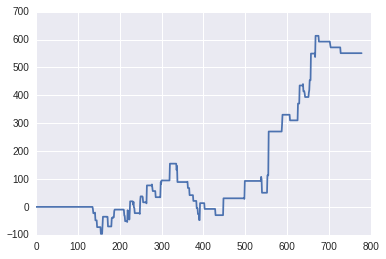

In [80]:
print("Choosen loss/cut   ",o.profit_take,o.loss_cut)
print("Balance            ",o.account.total_balance())
print("Number of trades   ",len(o.account.trades))
plt.plot(o.account.daily_total["open"].values[4000:])
plt.show()

In [81]:
%%time
rsopti = Random_Search_Optimizer("EURUSD","short","15Min",scores=bt_result)
best_accout,best_param,best_total_balance = rsopti.optimize(
                    min_ratio=1,
                    max_ratio=9,
                    trials=20)

CPU times: user 5.38 s, sys: 32 ms, total: 5.41 s
Wall time: 5.36 s


Choosen profit/loss cut    171 233
Threshold                  0.77
Balance                    1344.3
Number of trades           28


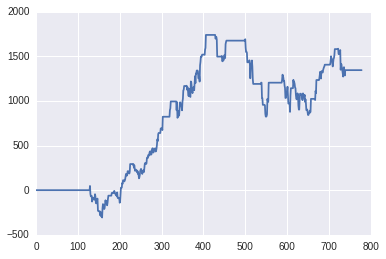

In [82]:
print("Choosen profit/loss cut   ",best_param[0],best_param[1])
print("Threshold                 ",best_param[2])
print("Balance                   ",best_accout.total_balance())
print("Number of trades          ",len(best_accout.trades))
plt.plot(best_accout.daily_total["open"].values[4000:])
plt.show()

In [38]:
%%time
rsopti = Random_Search_Optimizer("EURUSD","short","15Min",scores=bt_result)
best_accout,best_param,best_total_balance = rsopti.optimize(
                    min_ratio=1,
                    max_ratio=9,
                    trials=40)

CPU times: user 11.3 s, sys: 136 ms, total: 11.4 s
Wall time: 11.4 s


Choosen profit/loss cut    223 193
Threshold                  0.61
Balance                    1997.0
Number of trades           31


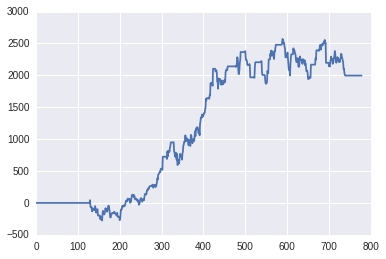

In [39]:
print("Choosen profit/loss cut   ",best_param[0],best_param[1])
print("Threshold                 ",best_param[2])
print("Balance                   ",best_accout.total_balance())
print("Number of trades          ",len(best_accout.trades))
plt.plot(best_accout.daily_total["open"].values[4000:])
plt.show()

In [40]:
%%time
rsopti = Random_Search_Optimizer("EURUSD","short","15Min",scores=bt_result)
best_accout,best_param,best_total_balance = rsopti.optimize(
                    min_ratio=1,
                    max_ratio=9,
                    trials=60)

CPU times: user 16 s, sys: 288 ms, total: 16.3 s
Wall time: 16.2 s


Choosen profit/loss cut    251 204
Threshold                  0.59
Balance                    2169.5
Number of trades           28


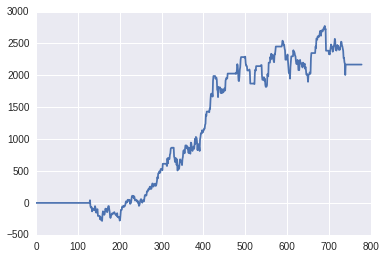

In [41]:
print("Choosen profit/loss cut   ",best_param[0],best_param[1])
print("Threshold                 ",best_param[2])
print("Balance                   ",best_accout.total_balance())
print("Number of trades          ",len(best_accout.trades))
plt.plot(best_accout.daily_total["open"].values[4000:])
plt.show()

---

Choosen profit/loss cut    261 30
Balance                    2820.5
Number of trades           175


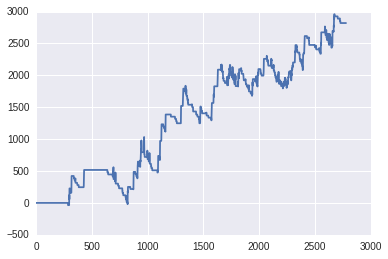

In [231]:
print("Choosen profit/loss cut   ",out.profit_take,o.loss_cut)
print("Balance                   ",out.account.total_balance())
print("Number of trades          ",len(out.account.trades))
plt.plot(out.account.daily_total["open"].values[2000:])
plt.show()

Balance             1133.3
Number of trades    12


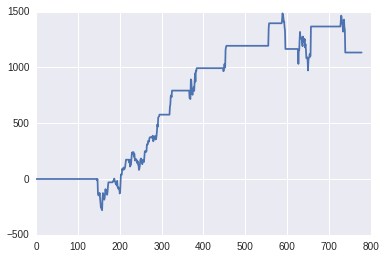

In [59]:
# 200, 228, 0.94, 2328.10, 31
profit_take , loss_cut = 200 , 228
threshold = 0.94
backtest = Backtest("EURUSD",scores=bt_result)
res = backtest.profit(profit_take, loss_cut, "short", threshold)
print("Balance            ",res.total_balance())
print("Number of trades   ",len(res.trades))
plt.plot(res.daily_total["open"].values[4000:])
plt.show()

In [10]:
res.total_balance()

556.6000000000015

In [22]:
profit_take , loss_cut = 3 , 1
backtest = Backtest("USDJPY",scores=bt_result)
ratio = Ratio(profit_take , loss_cut) #profit_take : loss_cut = a : b

# Hyper parameters optimization

##### Put it an other way: fully automated exit rule paramaters selection

Random search, high performance on a big enought feature space, [reference](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)  
Gradient based optimization, chaining derivatives backwards through the entire training procedure, [paper](http://jmlr.org/proceedings/papers/v37/maclaurin15.pdf)

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Random search opt

In [100]:
already_tried = {}
log = []

In [17]:
%%time

trials = 40

for i in tqdm.tqdm(range(trials),leave=True): 
    yep = True
    cpt=0
    while yep:
        profit_take , loss_cut = np.random.randint(1,10) , np.random.randint(1,10)
        threshold = float('%.2f'%(np.random.rand()/2+0.5))
        cpt+=1
        if cpt>10:
            print("should not happen (tried all the feature space?)")
            break
        try:
            already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)]
        except KeyError:
            yep = False
            already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)] = 1
    
    backtest = Backtest("USDJPY",scores=bt_result)
    ratio = Ratio(profit_take , loss_cut) #profit_take : loss_cut = a : b
    optimizer = Optimizer(backtest,ratio,"long",threshold=threshold) # side: "long" or "short", 
    o = optimizer.optimize(timeframe='15Min')
    
    log.append([profit_take,loss_cut,threshold,o.account.balance])

100%|██████████| 40/40 [01:12<00:00,  1.61s/it]

CPU times: user 48 s, sys: 25.2 s, total: 1min 13s
Wall time: 1min 12s


In [18]:
best_params = sorted(log,key=lambda a: a[3],reverse=True)
best_params[:10]

[[1, 8, 0.67, 703.19999999999982],
 [8, 3, 0.73, 534.10000000000218],
 [8, 4, 0.66, 440.09999999999394],
 [2, 8, 0.56, 421.29999999999808],
 [5, 1, 0.57, 376.39999999999816],
 [5, 9, 0.9, 365.99999999999113],
 [9, 4, 0.53, 364.20000000000243],
 [1, 8, 0.9, 359.89999999999753],
 [4, 6, 0.97, 359.59999999999752],
 [2, 6, 0.87, 354.69999999999402]]

In [4]:
def generate_random(clip_bottom,clip_top):
    diff = clip_top - clip_bottom
    scale = diff*0.05 * 0.7
    center = np.random.rand(2)*(diff * 0.9) + clip_bottom + diff*0.05
    profit_take = int(np.clip( np.random.normal(center[0] , scale) ,clip_bottom,clip_top))
    loss_cut = int(np.clip( np.random.normal(center[1] , scale) ,clip_bottom,clip_top))
    return profit_take,loss_cut

In [5]:
# 2,108
# 20160316-154406_slk80-4-app-2-www_8a437b40
# 1897 profit
# 20160313-131604_slk80-3-app-1-www_937d281d
# -2019 loss, short 4,3 1Min, 02/03/14 01/03/16
# 20160329-110657_slk80-4-app-2-www_83f4f15f
# 960 profit, 12/02/08 12/02/16
# 20160309-112926_slk80-3-app-1-www_2425949d, short, EURUSD, 3, 1, 15Min
tl = TrainLogger(training_id="20160309-112926_slk80-3-app-1-www_2425949d")

tl.path_fmt = 'trading/hdf5/prod/{}'

tl.training_id = "20160309-112926_slk80-3-app-1-www_2425949d"

path = tl.path_fmt.format(tl.training_id)

bucket = tl._bucket()
key = bucket.get_key(path)

with open("/project/data/cache/tttmp","w+") as f:
    key.get_file(f)

In [4]:
#%%time
# absolute_best = 1025.49  #obtained by long grid search
# '15Min': [5, 10, 15, 20, 30]
# 27s for 8 years, 3s for 2year

from trading.backtest.scorer import Scorer

training_id = "tttmp"
bt_start = datetime.datetime(2014, 2, 12, tzinfo=pytz.utc)
bt_end = datetime.datetime(2016, 2, 12, tzinfo=pytz.utc)
bt_batch_size = 50

bt_result = Scorer.calc_score(
    training_id,
    "EURUSD",
    "15Min",
    bt_start,
    bt_end,
    bt_batch_size)
# (b - a) * random_sample() + a

/usr/local/lib/python2.7/dist-packages/chainer/cuda.py:85: UserWarning: cuDNN is not enabled.
Please reinstall chainer after you install cudnn
(see https://github.com/pfnet/chainer#installation).
  'cuDNN is not enabled.\n'


AttributeError: 'module' object has no attribute 'memory_pool'

In [5]:
import cupy

In [6]:
cupy.cuda.memory.MemoryPool.free_all_free()

TypeError: descriptor 'free_all_free' of 'cupy.cuda.memory.MemoryPool' object needs an argument

In [42]:
%%time
backtest = Backtest("EURUSD",scores=bt_result)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16 µs


In [47]:
%%time
%%timeit
backtest.profit(30, 20, "short", 0.8)

DB 24 got pd db 0.720368146896
DB 24 calc 1.57963013649
DB 24 got pd db 0.742202997208
DB 24 calc 1.61627101898
DB 24 got pd db 0.67565202713
DB 24 calc 1.52830505371
DB 24 got pd db 0.694643974304
DB 24 calc 1.52188801765
1 loop, best of 3: 1.54 s per loop
CPU times: user 616 ms, sys: 5.74 s, total: 6.36 s
Wall time: 6.34 s


In [5]:
import time, os
# 
from multiprocessing import Pool, TimeoutError

In [6]:
from histdata import get_pandadb, get_table_name
from trading.simulator import get_trade_entry_timestamps, calc
import numpy as np

class Random_Search_Optimizer(object):

    def __init__(self, symbol, side, timeframe, scores):
        """Optimize the profit_take/loss_cut ratio.

        Determine the profit take / loss cut ratio producing the highest outcome
        using a random search iterative process.
        

        Args:
            backtest (Backtest): instance of `trading.backtest.optimizer.Backtest`.
            side      (string): "long" or "short".
            timeframe (string): ["1Min","5Min","15Min","1H","4H","1D"]
            
        Example:
            `optimizer = Random_Search_Optimizer(backtest)`
            `results   = optimizer.optimize("long",
                                            "15Min",
                                            min_ratio=1,
                                            max_ratio=9,
                                            trials=50)`

        """
        assert timeframe in ["1Min","5Min","15Min","1H","4H","1D"]
        assert side in ["long", "short"]

#         self.backtest = backtest
        self.best_total_balance = np.NINF
        self.best_param = None
        self.best_accout = None
        self.local_log = []
        self.already_tried = {}
        self.side = side
        self.timeframe = timeframe
        self.symbol = symbol
        pandadb = get_pandadb()
        self.df = pandadb[get_table_name(self.symbol, self.timeframe)]
        
        self.previous_threshold = None
        self.entry_timestamps = None
        
        self.scores = scores

    def _update_entry_timestamps(self, threshold):
        update = False
        if self.previous_threshold:
            update = (self.previous_threshold != threshold)
        else:
            update = True

        if update:
            self.entry_timestamps = get_trade_entry_timestamps(
                self.scores, threshold)
            self.previous_threshold = threshold

        return self.entry_timestamps
        
    def _calc_profit(self, profit_take, loss_cut, threshold):
        ttt = time.time()
#         print("DB",os.getpid(),"got pd db",time.time()-ttt)
#         return calc(
#             df,
#             self.update_entry_timestamps(threshold),
#             self.symbol,
#             side,
#             profit_take,
#             loss_cut)
        ret = calc(
            self.df,
            self._update_entry_timestamps(threshold),
            self.symbol,
            self.side,
            profit_take,
            loss_cut)
#         print("DB",os.getpid(),"calc",time.time()-ttt)
        return ret
        
    def _generate_random(self,clip_bottom,clip_top):
        """Generate random number with lower probability on the edges"""
        
        diff = clip_top - clip_bottom
        
        # choose appropriate standard deviation
        sigma = diff*0.05 * 0.7
        
        # uniform centers...
        mu = np.random.rand(2)*(diff * 0.9) + clip_bottom + diff*0.05
        
        # ...and gaussian distribution around
        profit_take = int(np.clip( np.random.normal(mu[0] , sigma),
                                  clip_bottom,clip_top))
        loss_cut = int(np.clip( np.random.normal(mu[1] , sigma),
                               clip_bottom,clip_top))
        
        return profit_take,loss_cut
    
    def _iterate_locally(self,clip_top,clip_bottom,n_first=4,n_around=3,s_sigma=0.005):
        """Refine the search space"""
        slog = sorted(np.array(self.local_log)[:,[0,1,2,3]],key=lambda x: x[3], reverse=True)
        slog = slog[:n_first]
        diff = clip_top - clip_bottom
        sigma = diff*s_sigma # standard deviation

        for i in slog:
            for j in xrange(n_around):
                not_tried = True
                cpt = 0
                while not_tried:
                    profit_take = int(np.random.normal(i[0] , sigma))
                    loss_cut = int(np.random.normal(i[1] , sigma))

                    threshold = float('%.2f'%(max(min(np.random.normal(i[2] , 0.02), 0.99), 0.5)))

                    cpt+=1
                    if cpt>100:
                        print(self.already_tried)
                        print(profit_take,loss_cut,threshold)
                        raise RuntimeError("Random Search tried all the feature space, should never happen")

                    # avoid exploring the same point twice
                    try:
                        self.already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)]
                    except KeyError:
                        not_tried = False
                        self.already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)] = 1

                res = self._calc_profit(profit_take, loss_cut, threshold)

                if res.total_balance() > self.best_total_balance:
                    self.best_total_balance = res.total_balance()
                    self.best_param = [profit_take,loss_cut,threshold]
                    self.best_accout = res

                self.local_log.append([profit_take,
                                       loss_cut,
                                       threshold,
                                       res.total_balance(),
                                       len(res.trades)
                                      ])

        


    def optimize(self, min_ratio=1, max_ratio=9, trials=25):
        """Optimize the profit_take/loss_cut ratio.
        
        Args:
            min_ratio    (int): minimum ratio to consider
            max_ratio    (int): maximum ratio to consider
            trials       (int): number of trials

        Returns:
            Optimized(profit_take, loss_cut, threshold, best_account)
            
        Raises:
            RuntimeError: If all the feature space has been explored.
                Should never happen.

        """
        ttt = time.time()
        np.random.seed()
        assert min_ratio<max_ratio
        trials = trials if trials<1000 else 1000
        

        candidates = {
                '1Min': [5, 15],
                '5Min': [5, 20],
                '15Min': [5, 30],
                '1H': [10, 60],
                '4H': [10, 80],
                '1D': [10, 90],
            }
        
        min_multiplier, max_multiplier = candidates[self.timeframe]
        clip_bottom, clip_top = min_ratio*min_multiplier, max_ratio*max_multiplier
        
        
#         print(">>",os.getpid(),"Start trials",time.time()-ttt)
        # try a series of random points in the restricted interesting search space
        for i in xrange(trials): 
            not_tried = True
            cpt=0
            while not_tried:
                profit_take , loss_cut = self._generate_random(clip_bottom,clip_top)
                
                threshold = float('%.2f'%(np.random.uniform(0.5, 0.99)))

                cpt+=1
                if cpt>100:
                    raise RuntimeError("Random Search tried all the feature space, should never happen")
                    
                # avoid exploring the same point twice
                try:
                    self.already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)]
                except KeyError:
                    not_tried = False
                    self.already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)] = 1            
            res = self._calc_profit(profit_take, loss_cut, threshold)
            
            if res.total_balance() > self.best_total_balance:
                self.best_total_balance = res.total_balance()
                self.best_param = [profit_take,loss_cut,threshold]
                self.best_accout = res
            
            self.local_log.append([profit_take,
                                   loss_cut,
                                   threshold,
                                   res.total_balance(),
                                   len(res.trades)
                                  ])
#         print(">>",os.getpid(),"Finished trials",time.time()-ttt)
        
        # iteratively refine the best results    
#         print("First",os.getpid())
#         print(self.best_param)
#         print(self.best_total_balance)
        self._iterate_locally(clip_top,clip_bottom,n_first=3,n_around=3,s_sigma=0.014)
#         print(">>",os.getpid(),"Finished iterate 0",time.time()-ttt)
#         self._iterate_locally(clip_top,clip_bottom,n_first=10,n_around=5,s_sigma=0.009)
#         print("Then",os.getpid())
#         print(self.best_param)
#         print(self.best_total_balance)
#         print(">>",os.getpid(),"Finished iterate 1",time.time()-ttt)
        self._iterate_locally(clip_top,clip_bottom,n_first=1,n_around=4,s_sigma=0.005)
#         print("Last",os.getpid())
#         print(self.best_param)
#         print(self.best_total_balance)
#         print(">>",os.getpid(),"Finished iterate 2",time.time()-ttt)


#         OptimizedRatio = namedtuple("OptimizedRatio", "account profit_take loss_cut threshold")
    
#         return OptimizedRatio(self.best_accout,*self.best_param) , np.array(self.local_log)  # !!!!
        return (self.best_accout,self.best_param,self.best_total_balance)

In [7]:
rso = Random_Search_Optimizer("EURUSD","short","15Min",scores=bt_result)

In [8]:
%%time
rso.optimize(min_ratio=1, max_ratio=9, trials=60)

CPU times: user 16.4 s, sys: 332 ms, total: 16.7 s
Wall time: 16.6 s


(<trading.simulator.Account at 0x7fe6ba2b7cd0>,
 [261, 163, 0.53],
 2318.7000000000289)

261, 163, 0.53, 2318.70, 30
260, 164, 0.56, 2302.40, 30
260, 165, 0.58, 2278.70, 30
259, 165, 0.57, 2263.90, 30
261, 165, 0.56, 2258.30, 30
254, 169, 0.58, 2239.20, 30
253, 165, 0.56, 2222.80, 30
211, 238, 0.59, 2209.10, 31
208, 234, 0.56, 2189.20, 31
210, 243, 0.59, 2188.50, 31
Choosen profit/loss cut    261 163
Threshold                  0.53
Balance                    2318.7
Number of trades           30


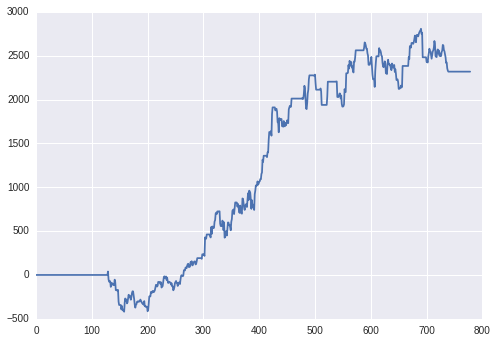

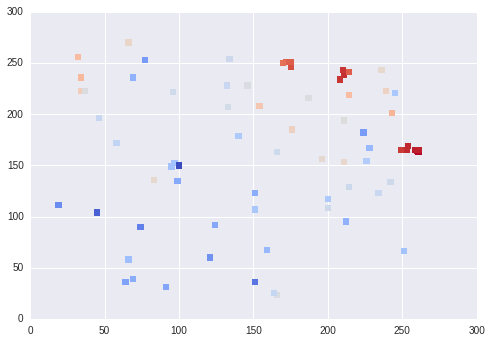

In [9]:
grid = np.array(sorted(rso.local_log,key=lambda x: x[3], reverse=True))
for i in grid[:10]:
    print("%0.f, %0.f, %.02f, %0.2f, %d"%(i[0],i[1],i[2],i[3],i[4]))
    
print("Choosen profit/loss cut   ",rso.best_param[0],rso.best_param[1])
print("Threshold                 ",rso.best_param[2])
print("Balance                   ",rso.best_accout.total_balance())
print("Number of trades          ",len(rso.best_accout.trades))
plt.plot(rso.best_accout.daily_total["open"].values[4000:])
plt.show()

ttt = grid[:,3]
col = (ttt - ttt.min()) / ttt.max()
plt.scatter(grid[:,0],
            grid[:,1],
            s=40,
            c=col,
            marker="s",
            linewidths=[0.,0.],
            cmap="coolwarm")
plt.show()

In [16]:
!pip install plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly as py

# takes ~3s
init_notebook_mode()

Cleaning up...


In [17]:
# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()

trace1 = go.Scatter3d(
    x=grid[:,0],
    y=grid[:,1],
    z=grid[:,3],
    mode='markers',
    marker=dict(
        size=12,
        color=grid[:,2],                # set color to an array/list of desired values
        colorscale='-Greys',   # Viridis, Hot, YIGnBu
        opacity=1
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

In [18]:
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [53]:
# high threshold in red
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [11]:
import time, os
# 
from multiprocessing import Pool, TimeoutError

In [22]:
#%%time
def do(backtest):
    ttt = time.time()
    print(os.getpid(),"Start <<")
    
    cls = Random_Search_Optimizer(backtest)
    print(">>",os.getpid(),"TIME",time.time()-ttt)
    
    res = cls.optimize(side="short",
                    timeframe="15Min",
                    min_ratio=1,
                    max_ratio=9,
                    trials=5)
    
    print(os.getpid(),"TIME",time.time()-ttt,"Exit >>")
    
    return res
outtt = []
# def optimize(self, side, timeframe, min_ratio=1, max_ratio=9, trials=25):
cls = Random_Search_Optimizer(backtest)

k_nearest = 3
pool = Pool(k_nearest)
dic = {}
for i in range(3):
    dic["result%d" % i] = pool.apply_async(
        do, [backtest])

for i in dic.iteritems():
    try:
        outtt.append(i[1].get(timeout=120))
    except TimeoutError:
        print("timeout")
        pass

pool.close()
pool.terminate()
pool.join()

best = sorted(outtt,key=lambda x: x[2], reverse=True)
best[:5]

369 Start <<
>> 369 TIME 0.00249099731445
>> 369 Start trials 0.000787019729614
370 Start <<
>> 370 TIME 0.00313591957092
>> 370 Start trials 0.000823974609375
371 Start <<
>> 371 TIME 0.00338101387024
>> 371 Start trials 0.000934839248657
>> 370 Finished trials 11.2663209438
370 TIME 11.2861728668 Exit >>
>> 369 Finished trials 11.799587965
369 TIME 11.8178310394 Exit >>
>> 371 Finished trials 12.3229618073
371 TIME 12.3389921188 Exit >>


[(<trading.simulator.Account at 0x7fa968a109d0>,
  [193, 150, 0.71],
  1318.2000000000246),
 (<trading.simulator.Account at 0x7fa95d183610>,
  [205, 100, 0.89],
  833.10000000002424),
 (<trading.simulator.Account at 0x7fa968b93650>,
  [98, 240, 0.71],
  506.20000000002585)]

In [699]:
best[:5]

[(<trading.simulator.Account at 0x7fcf99331850>,
  [147, 33, 0.74],
  1976.9000000001568),
 (<trading.simulator.Account at 0x7fcf98a981d0>,
  [168, 52, 0.86],
  1829.7000000000917),
 (<trading.simulator.Account at 0x7fcf9c271f10>,
  [195, 212, 0.92],
  1678.8000000000407),
 (<trading.simulator.Account at 0x7fcf98a982d0>,
  [235, 252, 0.9],
  1553.7000000000462),
 (<trading.simulator.Account at 0x7fcf98a984d0>,
  [146, 21, 0.72],
  1363.7000000001685)]

In [694]:
best

(<trading.simulator.Account at 0x7fcf9c271050>,
 [155, 24, 0.78],
 1960.9000000001374)

In [690]:
outtt

[(<trading.simulator.Account at 0x7fcf98518750>, [183, 243, 0.95]),
 (<trading.simulator.Account at 0x7fcf9849a0d0>, [184, 251, 0.95]),
 (<trading.simulator.Account at 0x7fcf98518710>, [249, 151, 0.84]),
 (<trading.simulator.Account at 0x7fcf98518d90>, [238, 176, 0.91])]

In [50]:
rsopti = Random_Search_Optimizer("EURUSD","short","15Min",scores=bt_result)

In [51]:
%%time
# out, rs_res = rsopti.optimize(side="short",
rsopti = Random_Search_Optimizer("EURUSD","short","15Min",scores=bt_result)
best_accout,best_param,best_total_balance = rsopti.optimize(
                    min_ratio=1,
                    max_ratio=9,
                    trials=5)

>> 0 153 152 0.85 1459.1
>> 1 121 211 0.89 641.5
>> 2 230 141 0.84 1022.9
>> 3 103 140 0.95 104.4
>> 4 110 166 0.81 319.6
First 405
[153, 152, 0.85]
1459.1
Then 405
[153, 152, 0.85]
1459.1
CPU times: user 2.19 s, sys: 184 ms, total: 2.37 s
Wall time: 2.17 s


Choosen profit/loss cut    171 233
Threshold                  0.77
Balance                    1344.3
Number of trades           28


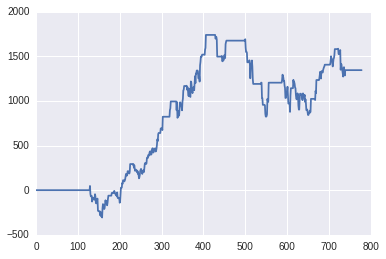

In [90]:
print("Choosen profit/loss cut   ",best_param[0],best_param[1])
print("Threshold                 ",best_param[2])
print("Balance                   ",best_accout.total_balance())
print("Number of trades          ",len(best_accout.trades))
plt.plot(best_accout.daily_total["open"].values[4000:])
plt.show()

In [417]:
grid = sorted(rs_res,key=lambda x: x[3], reverse=True)
for i in grid[:10]:
    print("%0.f, %0.f, %.02f, %0.2f, %d"%(i[0],i[1],i[2],i[3],i[4]))

188, 161, 0.92, 2436.80, 52
188, 163, 0.92, 2369.00, 52
186, 164, 0.92, 2331.50, 52
189, 163, 0.90, 2217.80, 64
180, 162, 0.90, 2143.90, 65
186, 163, 0.91, 2064.80, 58
183, 163, 0.91, 1937.60, 58
181, 160, 0.91, 1836.70, 59
28, 251, 0.87, 1834.40, 91
32, 257, 0.89, 1774.50, 81


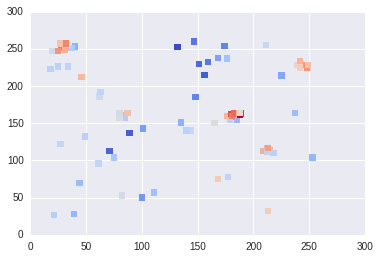

In [418]:
ttt = rs_res[:,3]
col = (ttt - ttt.min()) / ttt.max()
plt.scatter(rs_res[:,0],
            rs_res[:,1],
            s=40,
            c=col,
            marker="s",
            linewidths=[0.,0.],
            cmap="coolwarm")
plt.show()

In [619]:
!pip install ipyparallel

Downloading/unpacking ipyparallel
Cleaning up...


In [624]:
!ipcluster nbextension enable
# ipcluster nbextension disable

Enabling IPython clusters tab


In [625]:
!ipcluster start

2016-04-12 09:25:08.663 [IPClusterStart] Starting ipcluster with [daemon=False]
2016-04-12 09:25:08.664 [IPClusterStart] Creating pid file: /root/.ipython/profile_default/pid/ipcluster.pid
2016-04-12 09:25:08.664 [IPClusterStart] Starting Controller with LocalControllerLauncher
2016-04-12 09:25:09.668 [IPClusterStart] Starting 24 Engines with LocalEngineSetLauncher
^C2016-04-12 09:25:32.198 [IPClusterStart] ERROR | IPython cluster: stopping
2016-04-12 09:25:32.199 [IPClusterStart] Stopping Engines...



Process PoolWorker-43:
Traceback (most recent call last):
KeyboardInterrupt
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process PoolWorker-44:
Process PoolWorker-40:
Process PoolWorker-41:
Process PoolWorker-37:
Process PoolWorker-38:
    self.run()
Process PoolWorker-42:
Process PoolWorker-39:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258

In [628]:
import ipyparallel as ipp
clients = ipp.Client()
clients.block = True
clients.ids
view = clients.load_balanced_view()
dview = clients[:]

In [617]:
import os
import time

from multiprocessing import Pool, TimeoutError

def foo(*args,**kwargs):
    print(os.getpid(),os.getppid())
    time.sleep(1)
    return "bar"
    
k_nearest = 4
pool = Pool(k_nearest)
dic = {}
for i in range(5):
    dic["result%d" % i] = pool.apply_async(
        foo, [0.1, False])

for i in dic.iteritems():
    try:
        ret = i[1].get(timeout=3)
        print(ret)
    except TimeoutError:
        pass

pool.close()
pool.terminate()
pool.join()


295 25
293 25
294 25
296 25
295 25
bar
bar
bar
bar
bar


In [426]:
pool.

In [500]:
def primes(n):
    """ Returns  a list of primes < n """
    sieve = [True] * n
    for i in xrange(3,int(n**0.5)+1,2):
        if sieve[i]:
            sieve[i*i::2*i]=[False]*((n-i*i-1)//(2*i)+1)
    return [2] + [i for i in xrange(3,n,2) if sieve[i]]

In [473]:
def factor(n):
    i = 2
    limit = np.sqrt(n)    
    while i <= limit:
      if n % i == 0:
        print(i)
        n = n / i
        limit = np.sqrt(n)   
      else:
        i += 1
    if n > 1:
        print(n)

In [502]:
def primesfrom2to(n):
    """ Input n>=6, Returns a array of primes, 2 <= p < n """
    sieve = np.ones(n/3 + (n%6==2), dtype=np.bool)
    for i in xrange(1,int(n**0.5)//3+1):
        if sieve[i]:
            k=3*i+1|1
            sieve[       k*k//3     ::2*k] = False
            sieve[k*(k-2*(i&1)+4)//3::2*k] = False
    return np.r_[2,3,((3*np.nonzero(sieve)[0][1:]+1)|1)]

In [503]:
primesfrom2to(170)

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167])

In [515]:
170 // 12

14

In [546]:
z = np.random.randint(0,10,[4,5])

In [593]:
z

array([[1, 1, 9, 8, 4],
       [2, 6, 5, 7, 8],
       [1, 3, 8, 5, 7],
       [2, 1, 2, 1, 4]])

In [603]:
cc = 2

In [604]:
rr = cc % z.shape[1]
c = cc // rr
print(rr,c)

2 1


In [581]:
for i in range(1,len(z) // c):
    for j in range(1,c):
        print(z[(len(z) // c)*(i-1):(len(z) // c)*i,
                (z.shape[1] // rr)*(j-1):(z.shape[1] // rr)*j])
    print(z[(len(z) // c)*(i-1):(len(z) // c)*i,
                (z.shape[1] // rr)*j:])
print(z[(len(z) // c)*i:,
                (z.shape[1] // rr)*(j-1):(z.shape[1] // rr)*j])
print(z[(len(z) // c)*i:,
                (z.shape[1] // rr)*j:])

ZeroDivisionError: integer division or modulo by zero

In [551]:
range(1,1)

[]

In [457]:
def largest_prime_factor(n):
    i = 2
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
    return n

In [419]:
!cat /project/python/lib/ml/simsearch.py

# -*- coding: utf-8 -*-

import logging
import time
import copy
import json
import _ucrdtw
import histdata
from multiprocessing import Pool, TimeoutError

logger = logging.getLogger(__name__)


def _remove_duplicates(features):
    ret = []
    cache = set()
    for feat in features:
        tmp = copy.copy(feat)
        tmp.pop('id')
        key = json.dumps(tmp, sort_keys=True)
        if key not in cache:
            ret.append(feat)
            cache.add(key)
    return ret


def _remove_normalizers(features):
    ret = []
    for feat in features:
        if 'normalizers' in feat:
            feat.pop('normalizers')
        ret.append(feat)
    return ret


def split(df, fold=5):
    ret = []
    lenght = len(df)
    for i in range(fold):
        ret.append(df[i * lenght / fold:lenght / fold * (i + 1)])
    return ret


def search(mp, start, end, samples=10000, pca_dim=32, k_nearest=5):

    if k_nearest > 16:
        k_nearest = 16
        logger.warning("Capped to 16 k_nearest r

In [211]:
def random_search(backtest, side, timeframe, min_ratio=1, max_ratio=9, trials=20):
    local_log = []
    already_tried = {}
    trials = trials if trials<1000 else 1000
    assert min_ratio<max_ratio
    #timeframe="1Min"
    candidates = {
            '1Min': [5, 15],
            '5Min': [5, 20],
            '15Min': [5, 30],
            '1H': [10, 60],
            '4H': [10, 80],
            '1D': [10, 90],
        }
    min_multiplier, max_multiplier = candidates[timeframe]
    clip_bottom, clip_top = min_ratio*min_multiplier, max_ratio*max_multiplier
    
    for i in tqdm.tqdm(range(trials)):
        not_tried = True
        cpt=0
        while not_tried:
            profit_take , loss_cut = generate_random(clip_bottom,clip_top)

            threshold = float('%.2f'%(np.random.uniform(0.7, 0.98)))

            cpt+=1
            if cpt>100:
#                 print("should not happen (tried all the feature space?)") ### !!!
                raise RuntimeError("Random Search tried all the feature space, should never happen")
            try:
                already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)]
            except KeyError:
                not_tried = False
                already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)] = 1

        res = backtest.profit(profit_take, loss_cut, side, threshold)

        local_log.append([profit_take,
                    loss_cut,
                    threshold,
                    res.total_balance(),
                    len(res.trades),
                    #res,  # huge memory print!
                    i])
    return np.array(local_log)

Handle profit_take = loss_cut

In [212]:
rs_res = random_search(backtest,
                       side="short",
                       timeframe="1Min",
                       min_ratio=1,
                       max_ratio=9,
                       trials=10)

100%|██████████| 10/10 [00:25<00:00,  2.61s/it]


In [213]:
grid = sorted(rs_res,key=lambda x: x[3], reverse=True)
for i in grid[:5]:
    print("%0.f, %0.f, %.02f, %0.2f, %d, %d"%(i[0],i[1],i[2],i[3],i[4],i[5]))

73, 48, 0.92, 941.80, 65, 7
56, 66, 0.89, 810.40, 91, 6
55, 19, 0.84, 689.00, 136, 9
72, 67, 0.71, 620.60, 210, 0
82, 71, 0.88, 454.70, 93, 5


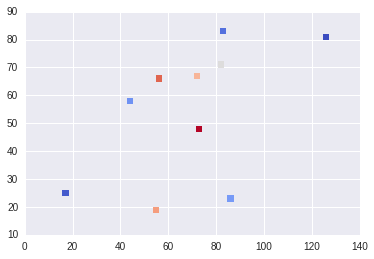

In [214]:
#ax = sns.heatmap(gg,xticklabels=50, yticklabels=50)
ttt = rs_res[:,3]
col = (ttt - ttt.min()) / ttt.max()
plt.scatter(rs_res[:,0],
            rs_res[:,1],
            s=40,
            c=col,
            marker="s",
            linewidths=[0.,0.],
            cmap="coolwarm")
plt.show()

In [148]:
grid = sorted(rs_res,key=lambda x: x[3], reverse=True)
for i in grid[:5]:
    print("%0.f, %0.f, %.02f, %0.2f, %d, %d"%(i[0],i[1],i[2],i[3],i[4],i[5]))

231, 49, 0.71, 2636.20, 191, 84
200, 228, 0.94, 2328.10, 31, 79
160, 32, 0.80, 2203.30, 156, 78
168, 19, 0.69, 2033.40, 233, 73
204, 236, 0.90, 1756.70, 56, 83


In [43]:
qerrqw = random_search(5,270,trials=5)

100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


In [48]:
sorted(np.append(qwer,qerrqw,axis=0)[:,[0,1,3]],key=lambda x: x[2], reverse=True)

[array([ 164. ,   29. ,  715.6]),
 array([ 140. ,   92. ,  519.9]),
 array([  21. ,  237. ,  424.8]),
 array([  77. ,   68. ,  422.7]),
 array([ 213.,   59.,  279.]),
 array([ 223. ,  160. ,  272.3]),
 array([  34. ,   59. ,  249.4]),
 array([ 178. ,  174. ,  175.8]),
 array([  40.,  182.,    0.]),
 array([ 117.,  174.,    0.])]

In [311]:
dic = {}
for idxi,i in enumerate(range(5,271)):
    for idxj,j in enumerate(range(5,271)):
        dic["%d,%d"%(i,j)] = [idxi,idxj]

gg = np.zeros([len(range(5,271)),len(range(5,271))])
for i in np.array(log)[:,[0,1,3]]:
    a = dic["%d,%d"%(i[0],i[1])]
    gg[a[0],a[1]] = i[2]
    
grid = sorted(np.array(log)[:,[0,1,3]],key=lambda x: x[2], reverse=True)
grid[:5]

[array([  158.3866802 ,   201.02212779,  1594.6       ]),
 array([  157.64095771,   190.90772516,  1444.2       ]),
 array([  153.86416818,   211.18053693,  1271.7       ]),
 array([  141.41715193,   247.07332402,  1196.5       ]),
 array([  132.66752998,    45.51596586,  1170.3       ])]

In [313]:
%%time
absolute_best = 1025.49  #obtained by long grid search
# '15Min': [5, 10, 15, 20, 30]
backtest = Backtest("USDJPY",scores=bt_result)

grid = sorted(np.array(log)[:,[0,1,2,3]],key=lambda x: x[3], reverse=True)
ggg = grid[:10]

for j in range(2):
    for idxi,i in enumerate(tqdm.tqdm(ggg)):
        yep = True
        cpt=0
        while yep:
    #         multiplier = np.random.choice([5, 10, 15, 20, 30])

    #         profit_take = np.random.randint(1,10)*multiplier
    #         loss_cut = np.random.randint(1,10)*multiplier

    #         profit_take = np.random.choice(range(5,275,15))
    #         loss_cut = np.random.choice(range(5,275,15))
            b = i[0]*1.1
            a = i[0]*0.9
            profit_take = (b - a) * np.random.rand() + a
            b = i[1]*1.1
            a = i[1]*0.9
            loss_cut = (b - a) * np.random.rand() + a

            threshold = i[2] #float('%.2f'%(np.random.rand()/2+0.5))

            cpt+=1
            if cpt>10:
                print("should not happen (tried all the feature space?)")
                break
            try:
                already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)]
            except KeyError:
                yep = False
                already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)] = 1

        res = backtest.profit(profit_take, loss_cut, "long", threshold)

        log.append([profit_take,
                    loss_cut,
                    threshold,
                    res.total_balance(),
                    len(res.trades),
                    #res,  # huge memory print!
                    idxi])

100%|██████████| 10/10 [00:13<00:00,  1.38s/it]

CPU times: user 24.8 s, sys: 2.76 s, total: 27.6 s
Wall time: 27.2 s


In [314]:
grid = sorted(np.array(log)[:,[0,1,3]],key=lambda x: x[2], reverse=True)
grid[:5]

[array([  158.3866802 ,   201.02212779,  1594.6       ]),
 array([  145.96458353,   210.40454111,  1544.9       ]),
 array([  162.40793762,   198.20505461,  1494.4       ]),
 array([  157.64095771,   190.90772516,  1444.2       ]),
 array([  146.60422745,   205.49598976,  1435.4       ])]

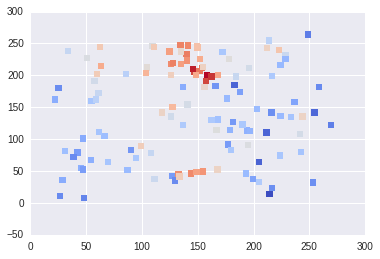

In [315]:
#ax = sns.heatmap(gg,xticklabels=50, yticklabels=50)
ttt = np.array(log)[:,3]
col = (ttt - ttt.min()) / ttt.max()
plt.scatter(np.array(log)[:,0],
            np.array(log)[:,1],
            s=40,
            c=col,
            marker="s",
            linewidths=[0.,0.],
            cmap="coolwarm")
plt.show()

### See notebook "Random space generation experiments" for experiments on the random generation

In [343]:
%%time
big_log = []
absolute_best = 1025.49  #obtained by long grid search
# '15Min': [5, 10, 15, 20, 30]
backtest = Backtest("USDJPY",scores=bt_result)

trials = 100

for j in tqdm.tqdm(range(1),leave=True):
    tmp=[]
    already_tried = {}
    log = []
    for i in range(trials):
        yep = True
        cpt=0
        while yep:
#             multiplier = np.random.choice([5, 10, 15, 20,25 ,30])

#             profit_take = np.random.randint(1,10)*multiplier
#             loss_cut = np.random.randint(1,10)*multiplier

            profit_take = np.random.choice(range(1,275,5))
            loss_cut = np.random.choice(range(1,275,5))

#             profit_take = np.random.randint(1,270)
#             loss_cut = np.random.randint(1,270)

            threshold = 0.8 #float('%.2f'%(np.random.rand()/2+0.5))

            cpt+=1
            if cpt>10:
                print("should not happen (random search don't intend to cover all the feature space)")
                break
            try:
                already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)]
            except KeyError:
                yep = False
                already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)] = 1

        res = backtest.profit(profit_take, loss_cut, "long", threshold)

        log.append([profit_take,
                    loss_cut,
                    threshold,
                    res.total_balance(),
                    len(res.trades),
                    #res,  # huge memory print!
                    i])

        reached = sorted(np.array(log)[:,[0,1,3]],key=lambda x: x[2], reverse=True)[0][2] / absolute_best
        tmp.append(reached)
    big_log.append(tmp)

100%|██████████| 1/1 [01:36<00:00, 96.29s/it]

CPU times: user 1min 23s, sys: 12.6 s, total: 1min 36s
Wall time: 1min 36s


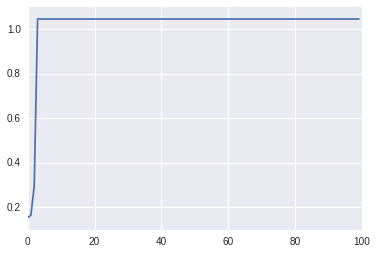

In [344]:
for i in big_log:
    plt.plot(i)
plt.show()

In [346]:
dic = {}
for idxi,i in enumerate(range(1,275,5)):
    for idxj,j in enumerate(range(1,275,5)):
        dic["%d,%d"%(i,j)] = [idxi,idxj]

gg = np.zeros([len(range(1,275,5)),len(range(1,275,5))])
for i in np.array(log)[:,[0,1,3]]:
    a = dic["%d,%d"%(i[0],i[1])]
    gg[a[0],a[1]] = i[2]
    
grid = sorted(np.array(log)[:,[0,1,3]],key=lambda x: x[2], reverse=True)
grid[:5]

[array([  176. ,   221. ,  1071.1]),
 array([  161. ,   226. ,  1050.2]),
 array([  211. ,   231. ,  1046.1]),
 array([  111. ,   201. ,  1020.2]),
 array([  171. ,   221. ,  1008.7])]

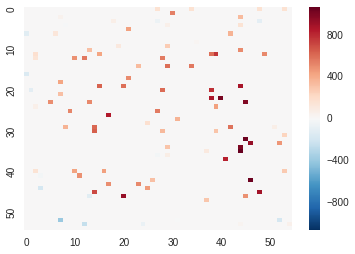

In [347]:
ax = sns.heatmap(gg,xticklabels=10, yticklabels=10)

In [259]:
absolute_best=grid2[0][2]

In [260]:
absolute_best

1025.4999999999952

In [303]:
print("Reach %0.2f%% of best possible" %( grid[0][2] / grid2[0][2] * 100 ))

Reach 99.00% of best possible


In [52]:
%%time

# full grid search on one level
log2 = []
for idxi,i in enumerate(tqdm.tqdm(range(5,275,15))):
    for idxj,j in enumerate(range(5,275,15)):
        # dic["%d,%d"%(i,j)] = [idxi,idxj]
        
        profit_take = i
        loss_cut = j
        
        res = backtest.profit(profit_take, loss_cut, "long", threshold)
        log2.append([profit_take,
                    loss_cut,
                    threshold,
                    res.total_balance(),
                    len(res.trades),
                    #res,
                    i])

CPU times: user 4min 36s, sys: 39.2 s, total: 5min 15s
Wall time: 5min 14s


In [313]:
with open("grid_search_res.pickle","w+") as f:
    cPickle.dump(log2, f)
# with open("grid_search_res.pickle","w+") as f:
#     log2 = cPickle.load(f)

In [282]:
dic = {}
for idxi,i in enumerate(range(5,275,15)):
    for idxj,j in enumerate(range(5,275,15)):
        dic["%d,%d"%(i,j)] = [idxi,idxj]

gg2 = np.zeros([len(range(5,275,15)),len(range(5,275,15))])
for i in np.array(log2)[:,[0,1,3]]:
    a = dic["%d,%d"%(i[0],i[1])]
    gg2[a[0],a[1]] = i[2]

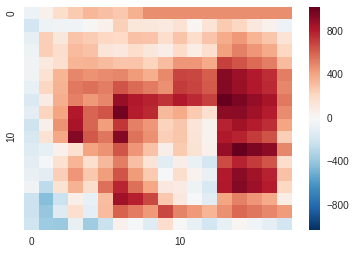

In [162]:
# uniform_data = np.random.rand(10, 12)
# sns.cubehelix_palette(start=2.8, rot=.1,as_cmap=True)
ax = sns.heatmap(gg2,xticklabels=10, yticklabels=10)

In [237]:
grid2 = sorted(np.array(log2)[:,[0,1,3]],key=lambda x: x[2], reverse=True)
grid2[:10]

[array([  170. ,   215. ,  1025.5]),
 array([  110. ,   200. ,  1020.7]),
 array([ 125. ,   95. ,  986.3]),
 array([ 170. ,  230. ,  967.5]),
 array([ 110. ,  215. ,  962.7]),
 array([  95.,  200.,  945.]),
 array([ 215. ,  215. ,  944.2]),
 array([ 155. ,   95. ,  942.2]),
 array([ 155. ,   50. ,  938.5]),
 array([  80. ,  200. ,  936.6])]

In [201]:
%matplotlib inline
#%matplotlib notebook

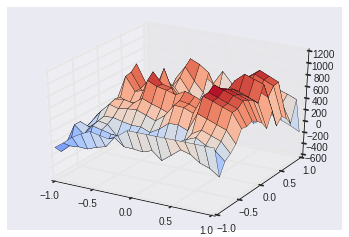

In [205]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,
                Y,
                gg,
                rstride=1,
                cstride=1,
                cmap=cm.coolwarm
                )
plt.show()

In [98]:
!pip install plotly
from plotly.graph_objs import Surface, Layout, Figure, Scene, XAxis, YAxis, ZAxis
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

# takes ~3s
init_notebook_mode()

axis = dict(
    showbackground=True, # (!) show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)

# Make a layout object
layout = Layout(
    title='Response Surface Analysis', # set plot title
    scene=Scene(  # (!) axes are part of a 'scene' in 3d plots
        xaxis=XAxis(axis), # set x-axis style
        yaxis=YAxis(axis), # set y-axis style
        zaxis=ZAxis(axis)  # set z-axis style
    )
)

Cleaning up...


In [305]:
sh = np.shape(gg)
xs = np.linspace(-1, 1, sh[0])
ys = np.linspace(-1, 1, sh[1])
X, Y = np.meshgrid(xs, ys)
trace1 = Surface(
    z=gg,  # link the fxy 2d numpy array
    x=X,  # link 1d numpy array of x coords
    y=Y   # link 1d numpy array of y coords
)
sh = np.shape(gg2)
xs = np.linspace(-1, 1, sh[0])
ys = np.linspace(-1, 1, sh[1])
X, Y = np.meshgrid(xs, ys)
trace2 = Surface(
    z=gg2,  # link the fxy 2d numpy array
    x=X,  # link 1d numpy array of x coords
    y=Y   # link 1d numpy array of y coords
)

In [306]:
fig = Figure(data=[trace1], layout=layout)
iplot(fig)
fig2 = Figure(data=[trace2], layout=layout)
iplot(fig2)

In [163]:
np.shape(gg)

(18, 18)

In [164]:
sh = np.shape(gg)
xs = np.linspace(-1, 1, sh[0])
ys = np.linspace(-1, 1, sh[1])
X, Y = np.meshgrid(xs, ys)

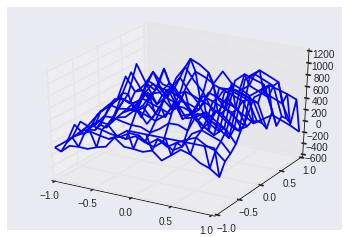

In [202]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X,
                  Y,
                  gg,
                  rstride=1,
                  cstride=2
                 )
plt.show()

In [58]:
x, y = np.random.randn(2, 50)

In [70]:
x,y = gg[:,0],gg[0,:]

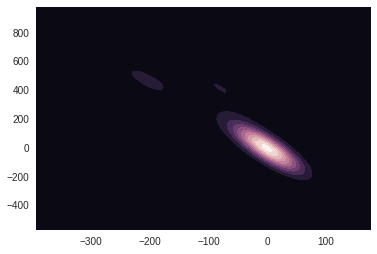

In [72]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
ax = sns.kdeplot(x, y, shade=True, cut=5, cmap=cmap)

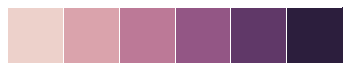

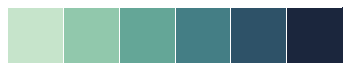

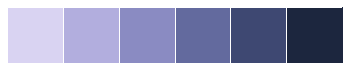

In [42]:
sns.palplot(sns.cubehelix_palette())
sns.palplot(sns.cubehelix_palette(rot=-.4))
sns.palplot(sns.cubehelix_palette(start=2.8, rot=.1))

In [58]:
best_params = np.array(sorted(log,key=lambda a: a[3],reverse=True))
best_params[:20][:,[0,1,2,3,4]]

array([[120, 90, 0.8, 967.49999999999557, 27],
       [135, 90, 0.8, 845.19999999999118, 28],
       [105, 105, 0.8, 827.79999999999768, 30],
       [90, 240, 0.8, 800.5999999999957, 23],
       [180, 210, 0.8, 788.39999999999577, 15],
       [120, 120, 0.8, 762.79999999999575, 26],
       [90, 90, 0.8, 725.79999999999393, 38],
       [135, 60, 0.8, 710.79999999999177, 36],
       [100, 160, 0.8, 668.89999999999509, 25],
       [240, 270, 0.8, 636.29999999999859, 9],
       [60, 240, 0.8, 619.19999999999231, 29],
       [120, 60, 0.8, 611.99999999999318, 37],
       [240, 90, 0.8, 597.399999999996, 15],
       [80, 70, 0.8, 581.5999999999932, 41],
       [135, 75, 0.8, 577.6999999999889, 34],
       [60, 60, 0.8, 556.99999999999216, 45],
       [90, 120, 0.8, 556.89999999999463, 34],
       [135, 30, 0.8, 540.99999999999682, 40],
       [120, 270, 0.8, 532.09999999999695, 17],
       [90, 30, 0.8, 493.39999999999975, 47]], dtype=object)

### Hierarchical experiment
(pseudo finetuning)

In [341]:
%%time

best = best_params[0]

# '15Min': [5, 10, 15, 20, 30]
backtest = Backtest("USDJPY",scores=bt_result)

trials = 10

for i in range(trials):
    yep = True
    cpt=0
    while yep:
#         multiplier = np.random.choice([5, 10, 15, 20, 30])
        
        profit_take = np.random.randint(best[0]-5,best[0]+5)
        loss_cut = np.random.randint(best[1]-5,best[1]+5)

        threshold = float('%.2f'%(best[2] + (np.random.rand()/5 - 0.1)))
        
        cpt+=1
        if cpt>10:
            print("should not happen (tried all the feature space?)")
            break
        try:
            already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)]
        except KeyError:
            yep = False
            already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)] = 1
    
    res = backtest.profit(profit_take, loss_cut, "long", threshold)
    
    log.append([profit_take,loss_cut,threshold,res.total_balance(),len(res.trades),res])

CPU times: user 11.8 s, sys: 13.6 s, total: 25.5 s
Wall time: 25.4 s


In [342]:
best_params = np.array(sorted(log,key=lambda a: a[3],reverse=True))
best_params[:20][:,[0,1,2,3,4]]

array([[93, 206, 0.69, 1085.3999999999985, 24],
       [92, 208, 0.7, 1062.0999999999979, 24],
       [91, 214, 0.71, 998.60000000000173, 24],
       [90, 210, 0.64, 998.09999999999809, 24],
       [92, 207, 0.74, 965.10000000000093, 23],
       [88, 213, 0.64, 944.39999999999782, 24],
       [94, 205, 0.62, 894.8999999999985, 25],
       [92, 213, 0.62, 821.99999999999864, 25],
       [86, 209, 0.62, 735.80000000000041, 25],
       [90, 75, 0.69, 600.10000000000048, 40],
       [86, 206, 0.58, 529.10000000000264, 26],
       [92, 206, 0.56, 384.50000000000415, 26],
       [90, 60, 0.59, 364.59999999999735, 43],
       [105, 45, 0.83, 326.0999999999953, 41],
       [30, 135, 0.57, 313.49999999999903, 57],
       [40, 70, 0.73, 247.29999999999706, 53],
       [35, 45, 0.99, 227.5999999999982, 15],
       [89, 210, -0.01, 90.30000000000058, 1],
       [86, 207, -0.06, 87.199999999999989, 1],
       [85, 212, 0.0, 85.699999999999932, 1]], dtype=object)

In [351]:
best = best_params[0]

In [352]:
print("Choosen loss/cut   ",best[0],best[1])
print("Balance            ",best[3])
print("Number of trades   ",best[4])

Choosen loss/cut    93 206
Balance             1085.4
Number of trades    24


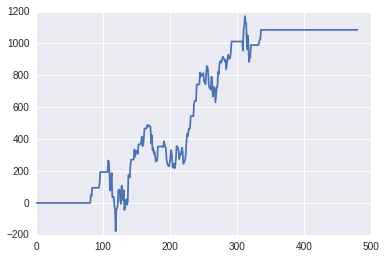

In [353]:
plt.plot(best[5].daily_total["open"].values[4300:])
plt.show()

In [ ]:
class Random_Search_Optimizer(object):

    def __init__(self, backtest):
        """Optimize the profit_take/loss_cut ratio.

        Determine the profit take / loss cut ratio producing the highest outcome
        using a random search iterative process.
        

        Args:
            backtest (Backtest): instance of `trading.backtest.optimizer.Backtest`.
            
        Example:
            `optimizer = Random_Search_Optimizer(backtest)`
            `results   = optimizer.optimize("long",
                                            "15Min",
                                            min_ratio=1,
                                            max_ratio=9,
                                            trials=50)`

        """

        self.backtest = backtest
        self.best_total_balance = np.NINF
        self.best_param = None
        self.best_accout = None
        self.side = None
        self.local_log = []
        self.already_tried = {}

        
    def _generate_random(self,clip_bottom,clip_top):
        """Generate random number with lower probability on the edges"""
        
        diff = clip_top - clip_bottom
        
        # choose appropriate standard deviation
        sigma = diff*0.05 * 0.7
        
        # uniform centers...
        mu = np.random.rand(2)*(diff * 0.9) + clip_bottom + diff*0.05
        
        # ...and gaussian distribution around
        profit_take = int(np.clip( np.random.normal(mu[0] , sigma),
                                  clip_bottom,clip_top))
        loss_cut = int(np.clip( np.random.normal(mu[1] , sigma),
                               clip_bottom,clip_top))
        
        return profit_take,loss_cut
    
    def _iterate_locally(self,clip_top,clip_bottom,n_first=4,n_around=3,s_sigma=0.005):
        """Refine the search space"""
        slog = sorted(np.array(self.local_log)[:,[0,1,2,3]],key=lambda x: x[3], reverse=True)
        slog = slog[:n_first]
        diff = clip_top - clip_bottom
        sigma = diff*s_sigma # standard deviation

        for i in tqdm.tqdm(slog):  # tqdm !!!
            for j in xrange(n_around):
                not_tried = True
                cpt = 0
                while not_tried:
                    profit_take = int(np.random.normal(i[0] , sigma))
                    loss_cut = int(np.random.normal(i[1] , sigma))

                    threshold = float('%.2f'%(max(min(np.random.normal(i[2] , 0.02), 0.99), 0.5)))

                    cpt+=1
                    if cpt>100:
                        print(self.already_tried)
                        print(profit_take,loss_cut,threshold)
                        raise RuntimeError("Random Search tried all the feature space, should never happen")

                    # avoid exploring the same point twice
                    try:
                        self.already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)]
                    except KeyError:
                        not_tried = False
                        self.already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)] = 1

                res = backtest.profit(profit_take, loss_cut, self.side, threshold)

                if res.total_balance() > self.best_total_balance:
                    self.best_total_balance = res.total_balance()
                    self.best_param = [profit_take,loss_cut,threshold]
                    self.best_accout = res

                self.local_log.append([profit_take,
                                       loss_cut,
                                       threshold,
                                       res.total_balance(),
                                       len(res.trades)
                                      ])

        


    def optimize(self, side, timeframe, min_ratio=1, max_ratio=9, trials=25):
        """Optimize the profit_take/loss_cut ratio.
        
        Args:
            side      (string): "long" or "short".
            timeframe (string): ["1Min","5Min","15Min","1H","4H","1D"]
            min_ratio    (int): minimum ratio to consider
            max_ratio    (int): maximum ratio to consider
            trials       (int): number of trials

        Returns:
            Optimized(profit_take, loss_cut, threshold, best_account)
            
        Raises:
            RuntimeError: If all the feature space has been explored.
                Should never happen.

        """
        
        assert side in ["long", "short"]
        assert timeframe in ["1Min","5Min","15Min","1H","4H","1D"]
        assert min_ratio<max_ratio
        trials = trials if trials<1000 else 1000
        self.side = side

        candidates = {
                '1Min': [5, 15],
                '5Min': [5, 20],
                '15Min': [5, 30],
                '1H': [10, 60],
                '4H': [10, 80],
                '1D': [10, 90],
            }
        
        min_multiplier, max_multiplier = candidates[timeframe]
        clip_bottom, clip_top = min_ratio*min_multiplier, max_ratio*max_multiplier
        
        

        # try a series of random points in the restricted interesting search space
        for i in tqdm.tqdm(xrange(trials)):  ## tqdm !!!
            not_tried = True
            cpt=0
            while not_tried:
                profit_take , loss_cut = self._generate_random(clip_bottom,clip_top)
                
                threshold = float('%.2f'%(np.random.uniform(0.7, 0.98)))

                cpt+=1
                if cpt>100:
                    raise RuntimeError("Random Search tried all the feature space, should never happen")
                    
                # avoid exploring the same point twice
                try:
                    self.already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)]
                except KeyError:
                    not_tried = False
                    self.already_tried["%d,%d,%f"%(profit_take,loss_cut,threshold)] = 1

            res = backtest.profit(profit_take, loss_cut, side, threshold)
            
            if res.total_balance() > self.best_total_balance:
                self.best_total_balance = res.total_balance()
                self.best_param = [profit_take,loss_cut,threshold]
                self.best_accout = res
            
            self.local_log.append([profit_take,
                                   loss_cut,
                                   threshold,
                                   res.total_balance(),
                                   len(res.trades)
                                  ])

        # iteratively refine the best results    
        self._iterate_locally(clip_top,clip_bottom,n_first=4,n_around=2,s_sigma=0.009)
        print(self.best_param)
        print(self.best_total_balance)
        self._iterate_locally(clip_top,clip_bottom,n_first=2,n_around=2,s_sigma=0.004)
        print(self.best_param)
        print(self.best_total_balance)

        OptimizedRatio = namedtuple("OptimizedRatio", "account profit_take loss_cut threshold")
    
        return OptimizedRatio(self.best_accout,*self.best_param) , np.array(self.local_log)  # !!!!